<a href="https://colab.research.google.com/github/Nehakp8842/Activity-/blob/main/Electric_Vehicles_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
pd.read_csv('electric_vechicle.csv')

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85
5,Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,disc (front + rear),4WD,95.0,369,...,3130.0,565.0,5,5,20,210,615.0,4.5,150,27.20
6,BMW i3,BMW,i3,169700,170,250,disc (front + rear),2WD (rear),42.2,359,...,1730.0,440.0,4,5,19,160,260.0,8.1,50,13.10
7,BMW i3s,BMW,i3s,184200,184,270,disc (front + rear),2WD (rear),42.2,345,...,1730.0,440.0,4,5,20,160,260.0,6.9,50,14.30
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
9,Citroën ë-C4,Citroën,ë-C4,125000,136,260,disc (front + rear),2WD (front),50.0,350,...,2000.0,459.0,5,5,16,150,380.0,9.5,100,NaN


In [ ]:
data = pd.read_csv('electric_vechicle.csv')

In [ ]:
# data --> rows and columns

data.shape

(53, 25)

In [ ]:
# Extrcat view the top records

data.head(10)

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85
5,Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,disc (front + rear),4WD,95.0,369,...,3130.0,565.0,5,5,20,210,615.0,4.5,150,27.20
6,BMW i3,BMW,i3,169700,170,250,disc (front + rear),2WD (rear),42.2,359,...,1730.0,440.0,4,5,19,160,260.0,8.1,50,13.10
7,BMW i3s,BMW,i3s,184200,184,270,disc (front + rear),2WD (rear),42.2,345,...,1730.0,440.0,4,5,20,160,260.0,6.9,50,14.30
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
9,Citroën ë-C4,Citroën,ë-C4,125000,136,260,disc (front + rear),2WD (front),50.0,350,...,2000.0,459.0,5,5,16,150,380.0,9.5,100,NaN


In [ ]:
# view the rows from last

data.tail(10)

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
43,Tesla Model S Performance,Tesla,Model S Performance,443990,772,1140,disc (front + rear),4WD,100.0,639,...,NaN,NaN,5,5,21,261,745.0,2.5,150,NaN
44,Tesla Model X Long Range Plus,Tesla,Model X Long Range Plus,407990,525,755,disc (front + rear),4WD,100.0,561,...,NaN,NaN,7,5,20,250,857.0,4.6,150,NaN
45,Tesla Model X Performance,Tesla,Model X Performance,482990,772,1140,disc (front + rear),4WD,100.0,548,...,NaN,NaN,7,5,20,261,857.0,2.8,150,NaN
46,Volkswagen e-up!,Volkswagen,e-up!,97990,83,210,disc (front) + drum (rear),2WD (front),32.3,258,...,1530.0,370.0,4,5,14,130,250.0,11.9,40,14.0
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,204,310,disc (front) + drum (rear),2WD (rear),58.0,425,...,2270.0,540.0,5,5,18,160,385.0,7.3,100,15.4
48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,179990,204,310,disc (front) + drum (rear),2WD (rear),77.0,549,...,2280.0,412.0,5,5,19,160,385.0,7.9,125,15.9
49,Volkswagen ID.4 1st,Volkswagen,ID.4 1st,202390,204,310,disc (front) + drum (rear),2WD (rear),77.0,500,...,2660.0,661.0,5,5,20,160,543.0,8.5,125,18.0
50,Citroën ë-Spacetourer (M),Citroën,ë-Spacetourer (M),215400,136,260,disc (front + rear),2WD (front),50.0,230,...,2810.0,1056.0,8,5,16,130,603.0,13.1,100,25.2
51,Mercedes-Benz EQV (long),Mercedes-Benz,EQV (long),339480,204,362,NaN,2WD (front),90.0,356,...,3500.0,865.0,6,5,17,160,NaN,NaN,110,28.2
52,Nissan e-NV200 evalia,Nissan,e-NV200 evalia,164328,109,254,disc (front + rear),2WD (front),40.0,200,...,2250.0,658.0,5,5,15,123,870.0,NaN,50,25.9


In [ ]:
# data exploration

data.describe()

,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Battery capacity [kWh],Range (WLTP) [km],Wheelbase [cm],Length [cm],Width [cm],Height [cm],Minimal empty weight [kg],Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,45.000000,45.000000,53.000000,53.000000,53.000000,53.000000,52.000000,50.00000,53.000000,44.000000
mean,246158.509434,269.773585,460.037736,62.366038,376.905660,273.581132,442.509434,186.241509,155.422642,1868.452830,2288.844444,520.466667,4.905660,4.849057,17.679245,178.169811,445.096154,7.36000,113.509434,18.994318
std,149187.485190,181.298589,261.647000,24.170913,118.817938,22.740518,48.863280,14.280641,11.275358,470.880867,557.796026,140.682848,0.838133,0.455573,1.868500,43.056196,180.178480,2.78663,57.166970,4.418253
min,82050.000000,82.000000,160.000000,17.600000,148.000000,187.300000,269.500000,164.500000,137.800000,1035.000000,1310.000000,290.000000,2.000000,3.000000,14.000000,123.000000,171.000000,2.50000,22.000000,13.100000
25%,142900.000000,136.000000,260.000000,40.000000,289.000000,258.800000,411.800000,178.800000,148.100000,1530.000000,1916.000000,440.000000,5.000000,5.000000,16.000000,150.000000,315.000000,4.87500,100.000000,15.600000
50%,178400.000000,204.000000,362.000000,58.000000,364.000000,270.000000,447.000000,180.900000,155.600000,1685.000000,2119.000000,486.000000,5.000000,5.000000,17.000000,160.000000,425.000000,7.70000,100.000000,17.050000
75%,339480.000000,372.000000,640.000000,80.000000,450.000000,290.000000,490.100000,193.500000,161.500000,2370.000000,2870.000000,575.000000,5.000000,5.000000,19.000000,200.000000,558.000000,9.37500,150.000000,23.500000
max,794000.000000,772.000000,1140.000000,100.000000,652.000000,327.500000,514.000000,255.800000,191.000000,2710.000000,3500.000000,1056.000000,8.000000,5.000000,21.000000,261.000000,870.000000,13.10000,270.000000,28.200000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


In [ ]:
# dropna --> helps to remove the rows missing values

data=data.dropna()

In [ ]:
# Drop columns with missing values

data.dropna(axis=1)

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85
5,Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,disc (front + rear),4WD,95.0,369,...,3130.0,565.0,5,5,20,210,615.0,4.5,150,27.20
6,BMW i3,BMW,i3,169700,170,250,disc (front + rear),2WD (rear),42.2,359,...,1730.0,440.0,4,5,19,160,260.0,8.1,50,13.10
7,BMW i3s,BMW,i3s,184200,184,270,disc (front + rear),2WD (rear),42.2,345,...,1730.0,440.0,4,5,20,160,260.0,6.9,50,14.30
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
10,DS DS3 Crossback e-tense,DS,DS3 Crossback e-tense,159900,136,260,disc (front + rear),2WD (front),50.0,320,...,1975.0,450.0,5,5,17,150,350.0,8.7,100,15.60


In [ ]:
# isna() --> helps to identify missing values (returns True where values are missing)

# Check for missing values in the entire DataFrame
data.isna()

# Check for missing values in each column (sum counts how many missing values are in each column)
data.isna().sum()

# Check for missing values in each row
data.isna().sum(axis=1)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
10,0


In [ ]:
# Create a mapping only for the columns you want to rename
rename_mapping = {
    'Car full name': 'car_name',
    'Minimal price (gross) [PLN]': 'min_price_pln',
    'Engine power [KM]': 'engine_power_km',
    'Maximum torque [Nm]': 'max_torque_nm',
    'Type of brakes': 'brake_type',
    'Drive type': 'drive_type',
    'Battery capacity [kWh]': 'battery_capacity_kwh',
    'Minimal empty weight [kg]': 'empty_weight_kg',
    'Permissible gross weight [kg]': 'gross_weight_kg',
    'Maximum load capacity [kg]': 'load_capacity_kg',
    'Number of seats': 'seats',
    'Number of doors': 'doors',
    'Tire size [in]': 'tire_size_in',
    'Maximum speed [kph]': 'max_speed_kph',
    'Boot capacity (VDA) [l]': 'boot_capacity_l',
    'Acceleration 0-100 kph [s]': 'acceleration_sec',
    'Maximum DCcharging power [kW]': 'max_dc_charge_kw',
    'Mean- Energy consumption [kWh/100 km]': 'energy_consumption_kwh_per_100km'
}

data = data.rename(columns=rename_mapping)

# Display the updated DataFrame
print(data.head())

                           car_name  Make                        Model  \
0            Audi e-tron 55 quattro  Audi            e-tron 55 quattro   
1            Audi e-tron 50 quattro  Audi            e-tron 50 quattro   
2             Audi e-tron S quattro  Audi             e-tron S quattro   
3  Audi e-tron Sportback 50 quattro  Audi  e-tron Sportback 50 quattro   
4  Audi e-tron Sportback 55 quattro  Audi  e-tron Sportback 55 quattro   

   min_price_pln  engine_power_km  max_torque_nm           brake_type  \
0         345700              360            664  disc (front + rear)   
1         308400              313            540  disc (front + rear)   
2         414900              503            973  disc (front + rear)   
3         319700              313            540  disc (front + rear)   
4         357000              360            664  disc (front + rear)   

  drive_type  battery_capacity_kwh  Range (WLTP) [km]  ...  \
0        4WD                  95.0                438 

In [ ]:
data.head()

,car_name,Make,Model,min_price_pln,engine_power_km,max_torque_nm,brake_type,drive_type,battery_capacity_kwh,Range (WLTP) [km],...,Permissable gross weight [kg],load_capacity_kg,seats,doors,tire_size_in,max_speed_kph,boot_capacity_l,acceleration_sec,Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [ ]:
#Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.

In [ ]:
 # a) Your task is to filter out EVs that meet these criteria.

data = data.rename(columns={
    'Range (WLTP) [km]': 'range_wltp_km'
})

filtered_data = data[(data['min_price_pln'] <= 350000) & (data['range_wltp_km'] >= 400)]
filtered_data

,car_name,Make,Model,min_price_pln,engine_power_km,max_torque_nm,brake_type,drive_type,battery_capacity_kwh,range_wltp_km,...,Permissable gross weight [kg],load_capacity_kg,seats,doors,tire_size_in,max_speed_kph,boot_capacity_l,acceleration_sec,Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70
22,Mercedes-Benz EQC,Mercedes-Benz,EQC,334700,408,760,disc (front + rear),4WD,80.0,414,...,2940.0,445.0,5,5,19,180,500.0,5.1,110,21.85
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,204,310,disc (front) + drum (rear),2WD (rear),58.0,425,...,2270.0,540.0,5,5,18,160,385.0,7.3,100,15.40
48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,179990,204,310,disc (front) + drum (rear),2WD (rear),77.0,549,...,2280.0,412.0,5,5,19,160,385.0,7.9,125,15.90
49,Volkswagen ID.4 1st,Volkswagen,ID.4 1st,202390,204,310,disc (front) + drum (rear),2WD (rear),77.0,500,...,2660.0,661.0,5,5,20,160,543.0,8.5,125,18.00


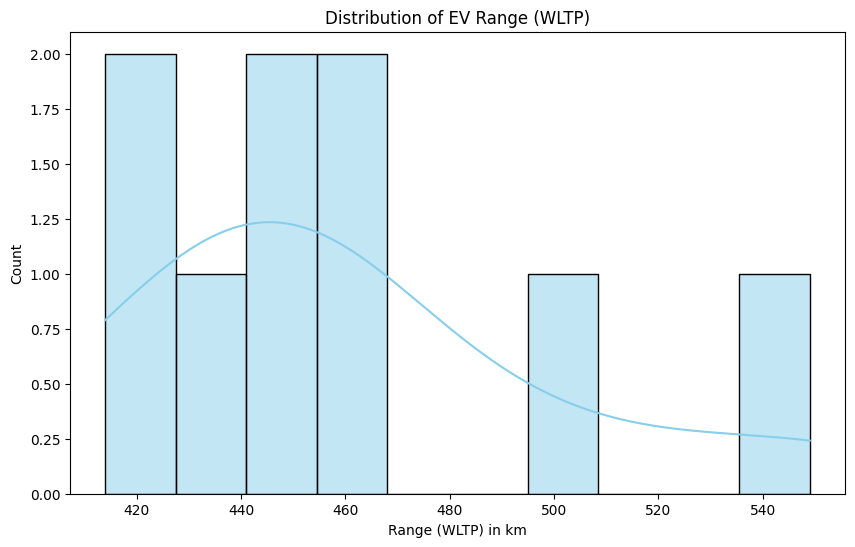

In [ ]:
# Histogram – Distribution of Range

plt.figure(figsize=(10,6))
sns.histplot(filtered_data['range_wltp_km'], bins=10, kde=True, color='skyblue')

plt.title('Distribution of EV Range (WLTP)')
plt.xlabel('Range (WLTP) in km')
plt.ylabel('Count')
plt.show()

In [ ]:
print("Skewness of EV range:", filtered_data['range_wltp_km'].skew())
variance = filtered_data['range_wltp_km'].var()
std_deviation = filtered_data['range_wltp_km'].std()

print("Variance of EV range:", variance)
print("Standard Deviation of EV range:", std_deviation)

Skewness of EV range: 1.398869475388359
Variance of EV range: 1694.4444444444443
Standard Deviation of EV range: 41.16363011742823


In [ ]:
# b) Group them by the manufacturer (Make).

grouped_data = filtered_data.groupby('Make').apply(lambda x: x.to_dict('records')).reset_index(name='cars')
print(grouped_data)

            Make                                               cars
0           Audi  [{'car_name': 'Audi e-tron 55 quattro', 'Make'...
1            BMW  [{'car_name': 'BMW iX3', 'Make': 'BMW', 'Model...
2        Hyundai  [{'car_name': 'Hyundai Kona electric 64kWh', '...
3            Kia  [{'car_name': 'Kia e-Niro 64kWh', 'Make': 'Kia...
4  Mercedes-Benz  [{'car_name': 'Mercedes-Benz EQC', 'Make': 'Me...
5     Volkswagen  [{'car_name': 'Volkswagen ID.3 Pro Performance...


/tmp/ipython-input-2011503628.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data = filtered_data.groupby('Make').apply(lambda x: x.to_dict('records')).reset_index(name='cars')


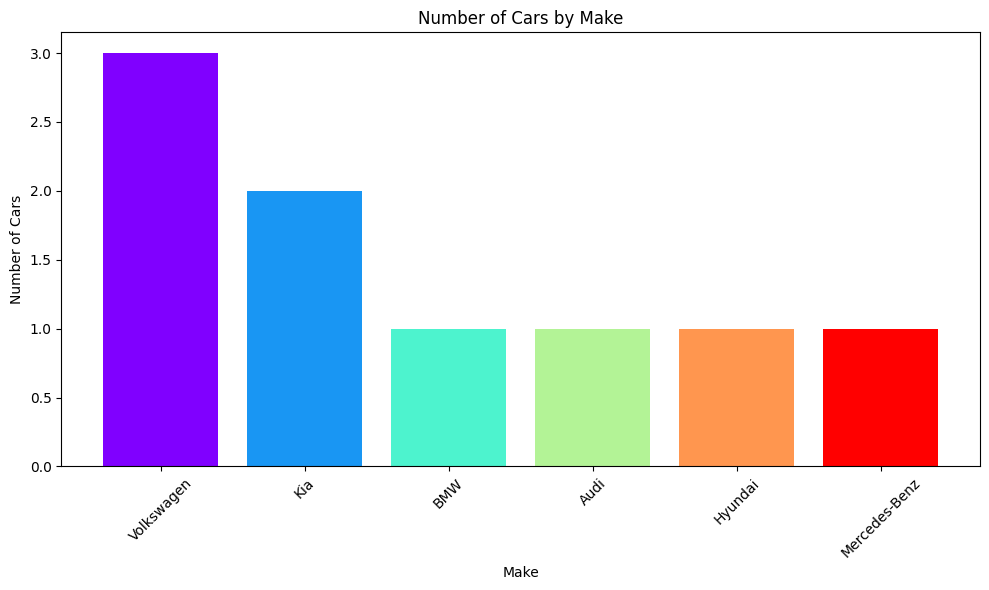

In [ ]:
# Count of cars by Make
make_counts = filtered_data['Make'].value_counts()

# Generate rainbow colors based on the number of makes
colors = plt.cm.rainbow(np.linspace(0, 1, len(make_counts)))

plt.figure(figsize=(10,6))
bars = plt.bar(make_counts.index, make_counts.values, color=colors)

plt.title('Number of Cars by Make')
plt.xlabel('Make')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# c) Calculate the average battery capacity for each manufacturer

# Group by manufacturer and calculate average battery capacity
avg_battery_capacity = filtered_data.groupby('Make')['battery_capacity_kwh'].mean().reset_index()

# Rename column for clarity
avg_battery_capacity = avg_battery_capacity.rename(columns={'battery_capacity_kwh': 'avg_battery_kwh'})

# Display the result
print(avg_battery_capacity)

            Make  avg_battery_kwh
0           Audi        95.000000
1            BMW        80.000000
2        Hyundai        64.000000
3            Kia        64.000000
4  Mercedes-Benz        80.000000
5     Volkswagen        70.666667


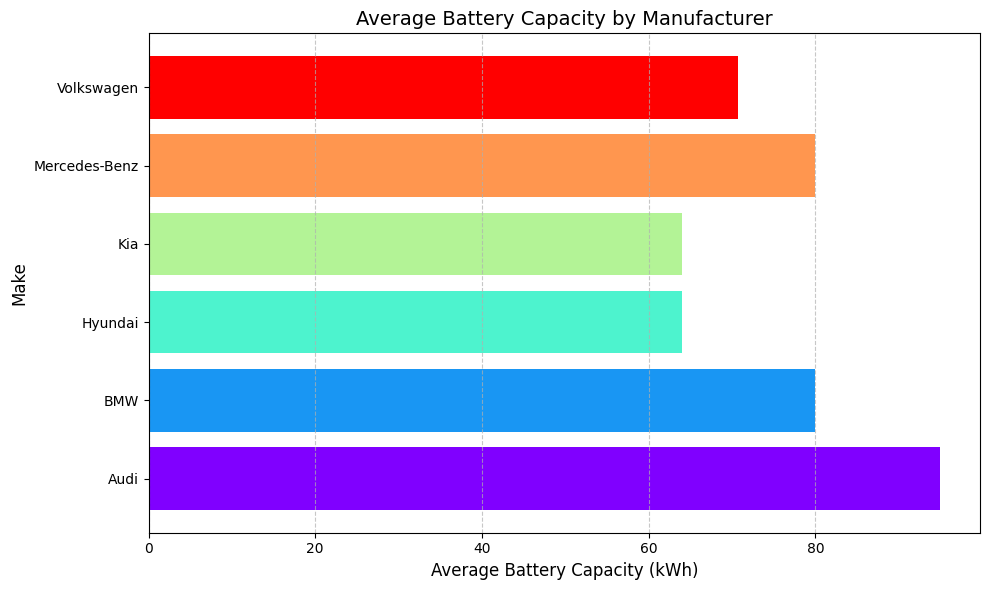

In [ ]:
# Generate rainbow colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_battery_capacity)))

# Create horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(avg_battery_capacity['Make'], avg_battery_capacity['avg_battery_kwh'], color=colors)

plt.title('Average Battery Capacity by Manufacturer', fontsize=14)
plt.xlabel('Average Battery Capacity (kWh)', fontsize=12)
plt.ylabel('Make', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
data.rename(columns={'mean - Energy Consumption [kWh/100 km]': 'Energy'}, inplace=True)

data.columns

Index(['car_name', 'Make', 'Model', 'min_price_pln', 'engine_power_km',
       'max_torque_nm', 'brake_type', 'drive_type', 'battery_capacity_kwh',
       'range_wltp_km', 'Wheelbase [cm]', 'Length [cm]', 'Width [cm]',
       'Height [cm]', 'empty_weight_kg', 'Permissable gross weight [kg]',
       'load_capacity_kg', 'seats', 'doors', 'tire_size_in', 'max_speed_kph',
       'boot_capacity_l', 'acceleration_sec', 'Maximum DC charging power [kW]',
       'mean - Energy consumption [kWh/100 km]'],
      dtype='object')

Lower Bound: 4.593749999999998, Upper Bound: 33.94375


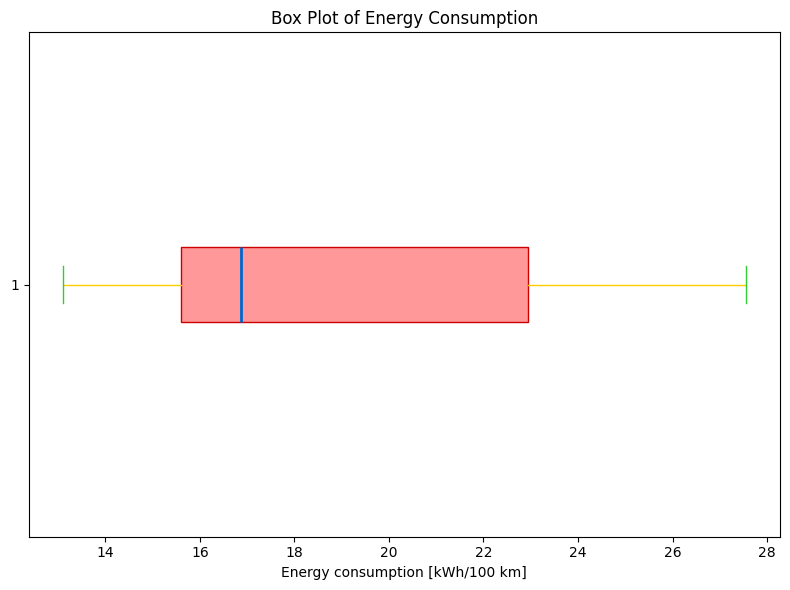

In [ ]:
# Task 2: You suspect some EVs have unusually high or low energy consumption.

data.rename(columns={'mean - Energy Consumption [kWh/100 km]': 'Energy'}, inplace=True)

data.columns

# Calculate quartiles and IQR

Q1 = data['mean - Energy consumption [kWh/100 km]'].quantile(0.25)
Q3 = data['mean - Energy consumption [kWh/100 km]'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Drop missing values from the column
energy = data['mean - Energy consumption [kWh/100 km]'].dropna()

# Plot boxplot with rainbow-inspired colors
plt.figure(figsize=(8, 6))
plt.boxplot(
    energy,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="#ff9999", color="#cc0000"),
    whiskerprops=dict(color="#ffcc00"),
    capprops=dict(color="#33cc33"),
    medianprops=dict(color="#0066cc", linewidth=2),
    flierprops=dict(marker="o", markerfacecolor="#9900cc", markersize=6, linestyle="none")
)

plt.title('Box Plot of Energy Consumption')
plt.xlabel('Energy consumption [kWh/100 km]')
plt.tight_layout()
plt.show()

In [ ]:
print(data['mean - Energy consumption [kWh/100 km]'].describe())

count    42.000000
mean     18.610714
std       4.134293
min      13.100000
25%      15.600000
50%      16.875000
75%      22.937500
max      27.550000
Name: mean - Energy consumption [kWh/100 km], dtype: float64


In [ ]:
#  Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.

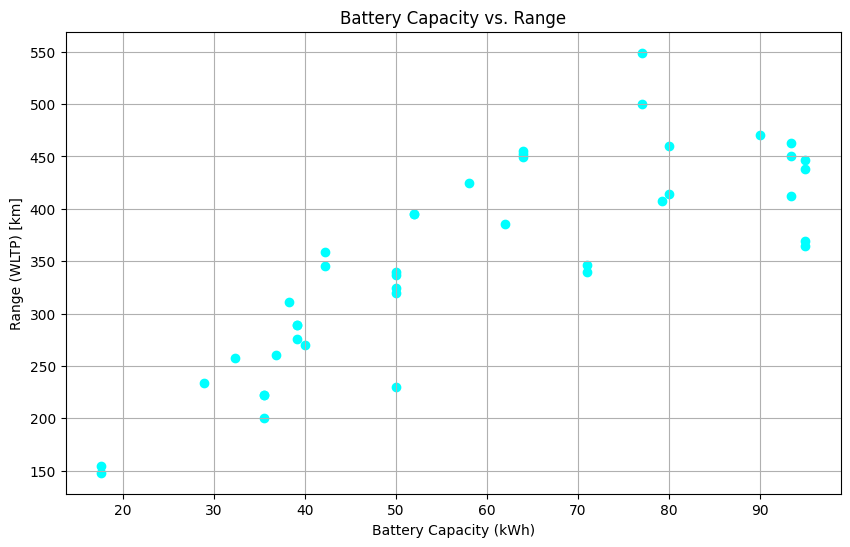

In [ ]:
# a) Create a suitable plot to visualize.

# using matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(data['battery_capacity_kwh'], data['range_wltp_km'], color='Cyan')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (WLTP) [km]')
plt.title('Battery Capacity vs. Range')
plt.grid(True)
plt.show()


Scatter Plot Analysis of Battery Capacity vs. Range

1. Objective
The purpose of this analysis is to visually explore the relationship between battery capacity and driving range of electric vehicles (EVs) using a scatter plot. The plot is customized by changing the color of the data points to improve visual clarity and emphasize the dataset’s distribution.

2. Methodology

A scatter plot was created using Matplotlib’s plt.scatter() function, where:

The X-axis represents the battery capacity in kilowatt-hours (battery_capacity_kwh).

The Y-axis represents the vehicle range in kilometers according to the WLTP standard (Range (WLTP) [km]).

The color of the points was set using the color parameter to enhance the plot’s readability and aesthetic appeal.

The plot includes axis labels, a title, and a grid for better interpretation of the data points.

3. Color Customization

To make the visualization more informative and visually appealing, we applied named colors in Python’s Matplotlib library.

4. Observations

The colored scatter plot allows us to easily identify trends, clusters, and outliers within the dataset.

Using a vibrant color like 'orange' improves the contrast, making patterns in the data more noticeable.

The gridlines further support visual analysis by making it easier to estimate values and compare data points.

5. Advantages of Using Color

Improved Visual Appeal – Makes the plot easier to interpret at a glance.

Data Highlighting – Helps to emphasize relationships and patterns in the dataset.

Presentation Ready – Enhances communication in reports, presentations, or dashboards.

Customizable – Allows users to select colors based on audience preferences or accessibility requirements.

6. Recommendations

Choose colors that are distinguishable and visually comfortable, especially for viewers with color vision deficiencies.

Use consistent color schemes when comparing multiple plots or datasets.

Combine color with other visual elements such as markers, sizes, or annotations to enrich the analysis.

7. Conclusion

The scatter plot created using Script 1, with customized colors, provides an effective way to visually explore the relationship between battery capacity and vehicle range. The use of named colors such as 'orange' improves readability and helps to highlight important patterns in the data, making it a useful tool for data analysis, reporting, and decision-making.

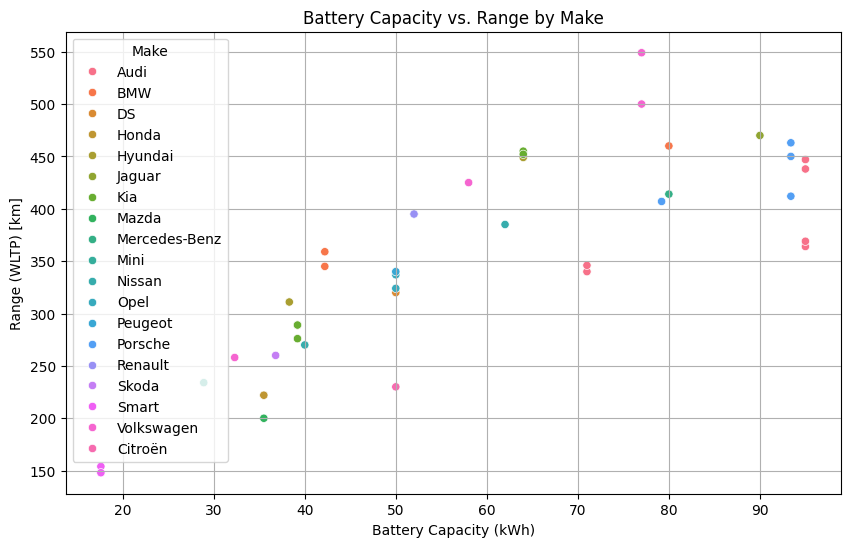

In [ ]:
# a) Create a suitable plot to visualize.

# using seaborn

import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x='battery_capacity_kwh', y='range_wltp_km', hue='Make', data=data)
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (WLTP) [km]')
plt.title('Battery Capacity vs. Range by Make')
plt.grid(True)
plt.show()

Analysis of Battery Capacity vs. Range by Brand

1. Objective

The purpose of this analysis is to explore the relationship between battery capacity and driving range for electric vehicles (EVs), with a focus on how this relationship varies across different manufacturers. By using a scatter plot colored by brand (Make), we aim to uncover patterns, efficiencies, and market positioning strategies.

2. Methodology

We utilized a scatter plot where:

X-axis represents the battery capacity (in kWh).

Y-axis represents the driving range according to WLTP standards (in km).

Points are colored by Make to distinguish between manufacturers.

This visualization helps us assess clustering, outliers, and relationships between capacity and range for each brand.

3. Key Findings

3.1 Brand Clustering

Tesla models are predominantly located in the upper-right quadrant of the plot, indicating a focus on vehicles with both high battery capacity and long driving range.

Hyundai exhibits a broader spread across capacities and ranges, suggesting a diverse portfolio targeting different segments of the EV market.

Nissan is concentrated in the lower capacity and lower range section, implying a focus on affordable or city-focused EVs.

3.2 Brand Diversity

Some brands, such as Hyundai, offer products across a wide spectrum, potentially catering to both budget-conscious and premium customers.

Others, like Nissan, appear to specialize in a specific segment, possibly due to market strategy or production constraints.

3.3 Outliers

Certain data points deviate from the main clusters, indicating possible prototype models, unique offerings, or data inconsistencies that warrant further investigation.

3.4 Efficiency Indicators

Among brands with similar battery capacity, differences in range highlight variations in vehicle efficiency.

Tesla’s ability to achieve higher range for comparable battery sizes suggests advanced energy management and lightweight design principles.

3.5 Market Gaps

A notable absence of brands in the mid-range capacity with high range category suggests potential opportunities for innovation and product development.

Filling this gap could attract customers looking for practical yet long-distance EV solutions.

4. Insights for Strategic Planning

Performance vs. Accessibility

Tesla’s focus on high-capacity, high-range models positions it as a premium brand.

Brands like Nissan target cost-sensitive customers, offering entry-level or urban mobility solutions.

Diversification Opportunities

Hyundai’s spread across segments shows an attempt to appeal to multiple customer bases, possibly through different price tiers and functionalities.

Innovation Potential

Mid-range capacity EVs with longer range represent a market opportunity that remains underdeveloped.

Data Quality Check

Outliers need further validation to ensure accuracy, as they could either signal new developments or erroneous entries.

5. Recommendations

For Brands:

Explore designs that enhance efficiency at lower capacities to better compete with high-end brands.

Consider filling gaps in mid-range, high-efficiency EV offerings to capture underserved markets.

For Analysts:

Perform further data cleaning to address outliers and missing values.

Incorporate additional parameters such as price, energy efficiency, and weight to refine the analysis.

6. Conclusion

The scatter plot provides valuable insights into how EV manufacturers differentiate themselves in terms of battery capacity and range. The clear clustering by brand enables stakeholders to understand market strategies, highlight areas for improvement, and identify opportunities for growth. This analysis sets the foundation for more in-depth research and strategic planning in the EV sector.

In [ ]:
# Task 4: Build an EV recommendation class

# Define the EV recommender class
class EVRecommender:
    def __init__(self, df):
        self.df = df

    def recommend_evs(self, budget, desired_range, desired_capacity):
        # Filter the DataFrame based on user inputs
        recommendations = self.df[
            (self.df['min_price_pln'] <= budget) &
            (self.df['range_wltp_km'] >= desired_range) &
            (self.df['battery_capacity_kwh'] >= desired_capacity)
        ]

        if recommendations.empty:
            return "No EVs match the specified criteria."

        # Sort and get top 3
        top_3 = recommendations.sort_values(
            by=['battery_capacity_kwh', 'range_wltp_km'],
            ascending=[False, False]
        ).head(3)

        return top_3[['car_name', 'min_price_pln', 'range_wltp_km', 'battery_capacity_kwh']]

# Create EV recommender instance
recommender = EVRecommender(data)

# User inputs
budget = 200000  # example: PLN
desired_range = 300  # km
desired_capacity = 50  # kWh

# Get recommendations
result = recommender.recommend_evs(budget, desired_range, desired_capacity)

# Display results
print(result)

                 car_name  min_price_pln  range_wltp_km  battery_capacity_kwh
48  Volkswagen ID.3 Pro S         179990            549                  77.0
18       Kia e-Niro 64kWh         167990            455                  64.0
20       Kia e-Soul 64kWh         160990            452                  64.0


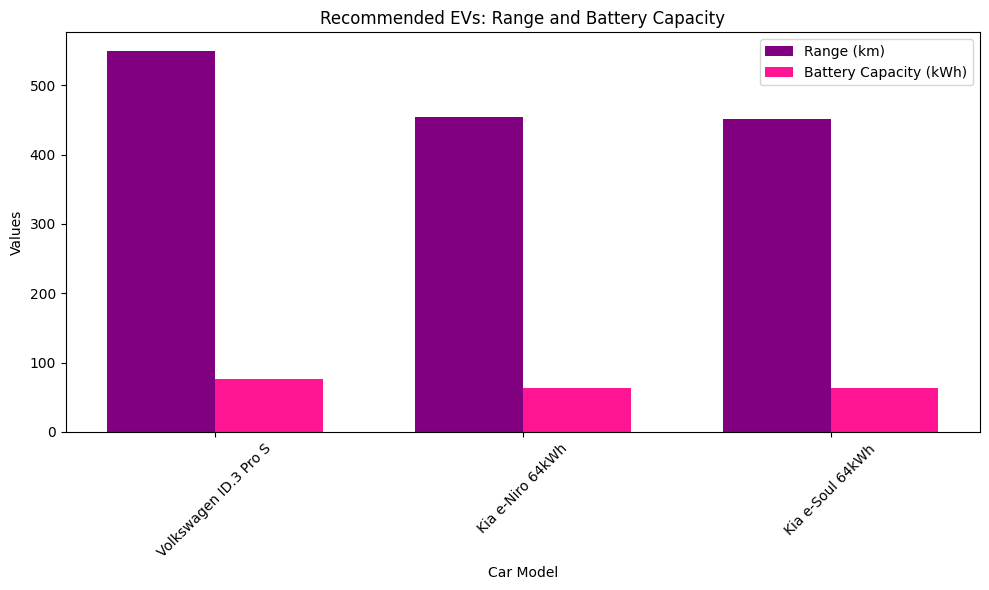

In [ ]:
if isinstance(result, str):
    print(result)
else:
    # Bar plot comparing range and battery capacity for recommended cars
    plt.figure(figsize=(10,6))

    index = np.arange(len(result))
    bar_width = 0.35

    plt.bar(index, result['range_wltp_km'], bar_width, label='Range (km)', color='purple')
    plt.bar(index + bar_width, result['battery_capacity_kwh'], bar_width, label='Battery Capacity (kWh)', color='deeppink')

    plt.xticks(index + bar_width / 2, result['car_name'], rotation=45)
    plt.xlabel('Car Model')
    plt.ylabel('Values')
    plt.title('Recommended EVs: Range and Battery Capacity')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Task 5: Inferential Statistics– Hypothesis Testing

# Load your dataset
df = pd.read_csv('electric_vechicle.csv')

# Filter the data for Tesla and Audi, and select 'Engine power [KM]'
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]'].dropna()
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]'].dropna()

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Result: There is a significant difference in the average Engine power between Tesla and Audi.")
else:
    print("Result: There is no significant difference in the average Engine power between Tesla and Audi.")

# Insights and recommendations
print("\nInsights and Recommendations:")
mean_tesla = tesla_power.mean()
mean_audi = audi_power.mean()
print(f"Average Engine Power of Tesla vehicles: {mean_tesla:.2f} KM")
print(f"Average Engine Power of Audi vehicles: {mean_audi:.2f} KM")

if p_value < alpha:
    if mean_tesla > mean_audi:
        print("Tesla vehicles have higher average engine power compared to Audi.")
    else:
        print("Audi vehicles have higher average engine power compared to Tesla.")
    print("Recommendation: Depending on performance requirements, customers may prefer the brand with higher engine power.")
else:
    print("Recommendation: Engine power is comparable between Tesla and Audi. Customers can base their decision on other features such as efficiency, design, or price.")

T-statistic: 1.7939951827297178
P-value: 0.10684105068839565
Result: There is no significant difference in the average Engine power between Tesla and Audi.

Insights and Recommendations:
Average Engine Power of Tesla vehicles: 533.00 KM
Average Engine Power of Audi vehicles: 392.00 KM
Recommendation: Engine power is comparable between Tesla and Audi. Customers can base their decision on other features such as efficiency, design, or price.


/tmp/ipython-input-284184740.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Make', y='Engine Power [KM]', data=plot_df, palette=['#FF69B4','#DB7093'])


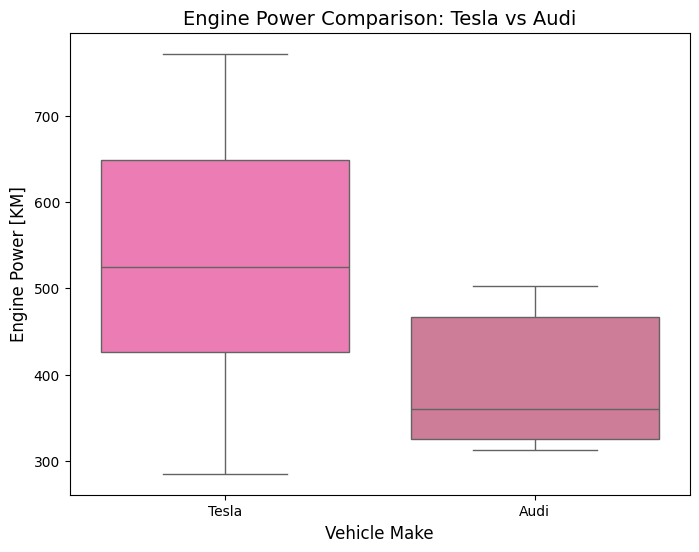

In [ ]:
# Load your dataset
df = pd.read_csv('electric_vechicle.csv')

# Filter the data for Tesla and Audi
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]'].dropna()
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]'].dropna()

# Combine into a single DataFrame for plotting
plot_df = pd.DataFrame({
    'Engine Power [KM]': pd.concat([tesla_power, audi_power]),
    'Make': ['Tesla']*len(tesla_power) + ['Audi']*len(audi_power)
})

# Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='Make', y='Engine Power [KM]', data=plot_df, palette=['#FF69B4','#DB7093'])
plt.title('Engine Power Comparison: Tesla vs Audi', fontsize=14)
plt.ylabel('Engine Power [KM]', fontsize=12)
plt.xlabel('Vehicle Make', fontsize=12)
plt.show()

T-statistic: 1.7939951827297178
P-value: 0.10684105068839565
Result: There is no significant difference in the average Engine power between Tesla and Audi.

Insights and Recommendations:
Average Engine Power of Tesla vehicles: 533.00 KM
Average Engine Power of Audi vehicles: 392.00 KM
Recommendation: Engine power is comparable between Tesla and Audi. Customers can base their decision on other features such as efficiency, design, or price.


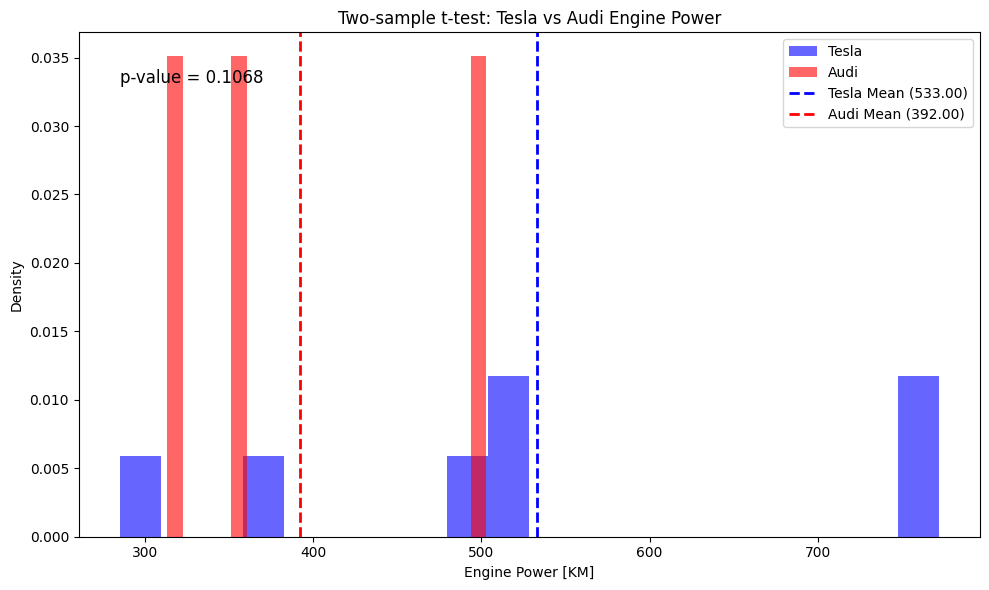

In [ ]:
# Task 5: Inferential Statistics– Hypothesis Testing

# Load your dataset
df = pd.read_csv('electric_vechicle.csv')

# Filter the data for Tesla and Audi, and select 'Engine power [KM]'
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]'].dropna()
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]'].dropna()

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Result: There is a significant difference in the average Engine power between Tesla and Audi.")
else:
    print("Result: There is no significant difference in the average Engine power between Tesla and Audi.")

# Insights and recommendations
print("\nInsights and Recommendations:")
mean_tesla = tesla_power.mean()
mean_audi = audi_power.mean()
print(f"Average Engine Power of Tesla vehicles: {mean_tesla:.2f} KM")
print(f"Average Engine Power of Audi vehicles: {mean_audi:.2f} KM")

if p_value < alpha:
    if mean_tesla > mean_audi:
        print("Tesla vehicles have higher average engine power compared to Audi.")
    else:
        print("Audi vehicles have higher average engine power compared to Tesla.")
    print("Recommendation: Depending on performance requirements, customers may prefer the brand with higher engine power.")
else:
    print("Recommendation: Engine power is comparable between Tesla and Audi. Customers can base their decision on other features such as efficiency, design, or price.")

plt.figure(figsize=(10, 6))

# Plot Tesla distribution
plt.hist(tesla_power, bins=20, alpha=0.6, label='Tesla', color='blue', density=True)

# Plot Audi distribution
plt.hist(audi_power, bins=20, alpha=0.6, label='Audi', color='red', density=True)

# Plot mean lines
plt.axvline(mean_tesla, color='blue', linestyle='dashed', linewidth=2, label=f'Tesla Mean ({mean_tesla:.2f})')
plt.axvline(mean_audi, color='red', linestyle='dashed', linewidth=2, label=f'Audi Mean ({mean_audi:.2f})')

# Annotate the p-value
plt.text(min(tesla_power.min(), audi_power.min()), max(plt.gca().get_ylim())*0.9, f'p-value = {p_value:.4f}', fontsize=12)

# Titles and labels
plt.xlabel('Engine Power [KM]')
plt.ylabel('Density')
plt.title('Two-sample t-test: Tesla vs Audi Engine Power')
plt.legend()

plt.tight_layout()
plt.show()
